# Creating a Filter, Edge Detection

### Import resources and display image

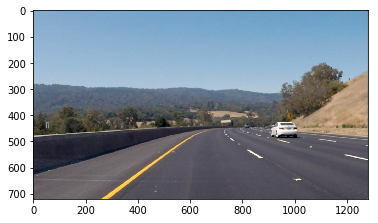

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

# Read in the image
image = mpimg.imread('data/curved_lane.jpg')

plt.imshow(image)

### Convert the image to grayscale

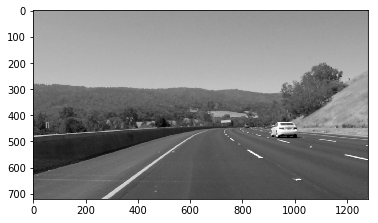

In [2]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')

### TODO: Create a custom kernel

Below, you've been given one common type of edge detection filter: a Sobel operator.

The Sobel filter is very commonly used in edge detection and in finding patterns in intensity in an image. Applying a Sobel filter to an image is a way of **taking (an approximation) of the derivative of the image** in the x or y direction, separately. The operators look as follows.

<img src="images/sobel_ops.png" width=200 height=200>

**It's up to you to create a Sobel x operator and apply it to the given image.**

For a challenge, see if you can put the image through a series of filters: first one that blurs the image (takes an average of pixels), and then one that detects the edges.

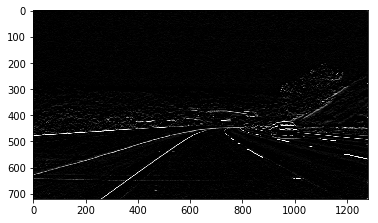

In [7]:
# Create a custom kernel

# 3x3 array for edge detection
sobel_y = np.array([[-1, -2, -1], 
                    [ 0,  0,  0], 
                    [ 1,  2,  1]])

## TODO: Create and apply a Sobel x operator
sobel_x = np.array([[-1,  0,  1],
                    [-2,  0,  2],
                    [-1,  0,  1]])


# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_image_y = cv2.filter2D(gray, -1, sobel_y)

plt.imshow(filtered_image_y, cmap='gray')

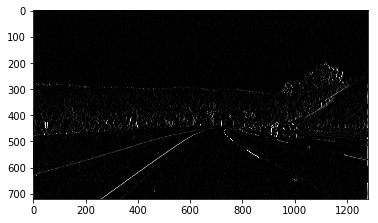

In [8]:
filtered_image_x = cv2.filter2D(gray, -1, sobel_x)

plt.imshow(filtered_image_x, cmap='gray')

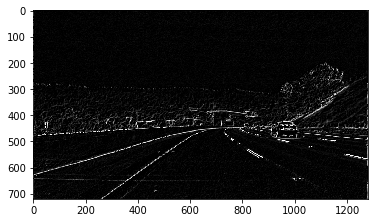

In [10]:
avg_filtered_image = (filtered_image_x + filtered_image_y) / 2

plt.imshow(avg_filtered_image, cmap='gray')

### Test out other filters!

You're encouraged to create other kinds of filters and apply them to see what happens! As an **optional exercise**, try the following:
* Create a filter with decimal value weights.
* Create a 5x5 filter
* Apply your filters to the other images in the `images` directory.



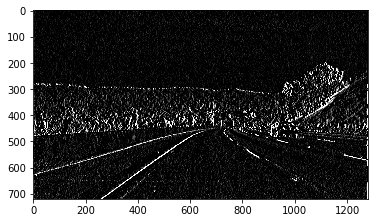

In [21]:
sobel_decimal = np.array([[-0.5,  0,  0.5],
                          [-1.0,  0,  1.0],
                          [-0.5,  0,  0.5]]) * 10

filtered_image = cv2.filter2D(gray, -1, sobel_decimal)

plt.imshow(filtered_image, cmap='gray')

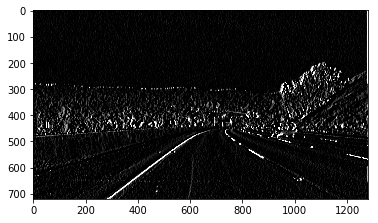

In [24]:
sobel_big = np.array([[ 1, .5,  0, -.5, -1],
                      [ 2, .5,  0, -.5, -2],
                      [ 2, .5,  0, -.5, -2],
                      [ 2, .5,  0, -.5, -2],
                      [ 1, .5,  0, -.5, -1]])

filtered_image = cv2.filter2D(gray, -1, sobel_big)

plt.imshow(filtered_image, cmap='gray')

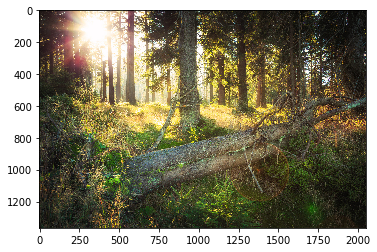

In [26]:
image = mpimg.imread('data/my_image.jpg')

plt.imshow(image)

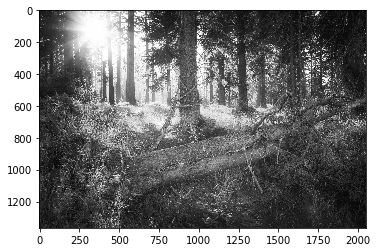

In [29]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')

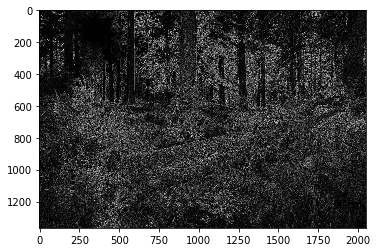

In [40]:
intensity_multiplier = 2
sobels = (
    np.array([[-1, -1, -1], 
              [ 0,  0,  0], 
              [ 1,  1,  1]]) * intensity_multiplier,
    np.array([[-1,  0,  1],
              [-1,  0,  1],
              [-1,  0,  1]]) * intensity_multiplier,
    np.array([[-1, -1,  2],
              [-1,  2, -1],
              [ 2, -1, -1]]) * intensity_multiplier,
    np.array([[ 2, -1, -1],
              [-1,  2, -1],
              [-1, -1,  2]]) * intensity_multiplier
)

filtered_images = [cv2.filter2D(gray, -1, sobel) for sobel in sobels]

plt.imshow(np.stack(filtered_images, axis=0).mean(axis=0), cmap='gray')

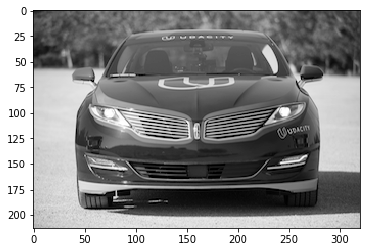

In [41]:
image = mpimg.imread('data/udacity_sdc.png')
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')

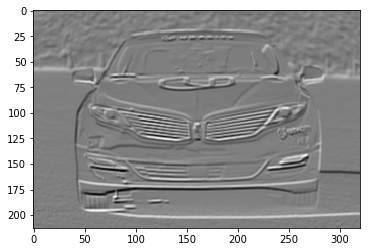

In [81]:
intensity_multiplier = 1
sobels = [
    np.array([[-1, -1, -1, -1], 
              [-1, -1, -1, -1], 
              [ 1,  1,  1,  1],
              [ 1,  1,  1,  1]]) * intensity_multiplier,
    np.array([[ 1,  1,  1,  1], 
              [ 1,  1,  1,  1], 
              [-1, -1, -1, -1],
              [-1, -1, -1, -1]]) * intensity_multiplier,
    np.array([[-1, -1,  1,  1],
              [-1, -1,  1,  1],
              [-1, -1,  1,  1],
              [-1, -1,  1,  1]]) * intensity_multiplier,
    np.array([[ 1,  1, -1, -1],
              [ 1,  1, -1, -1],
              [ 1,  1, -1, -1],
              [ 1,  1, -1, -1]]) * intensity_multiplier,
    np.array([[-1, -1, -1,  0],
              [-1, -1,  0,  1],
              [-1,  0,  1,  1],
              [ 0,  1,  1,  1]]) * intensity_multiplier,
    np.array([[ 1,  1,  1,  0],
              [ 1,  1,  0, -1],
              [ 1,  0, -1, -1],
              [ 0, -1, -1, -1]]) * intensity_multiplier,
    np.array([[ 0, -1, -1, -1],
              [ 1,  0, -1, -1],
              [ 1,  1,  0, -1],
              [ 1,  1,  1,  0]]) * intensity_multiplier,
    np.array([[ 0,  1,  1,  1],
              [-1,  0,  1,  1],
              [-1, -1,  0,  1],
              [-1, -1, -1,  0]]) * intensity_multiplier
]

filtered_images = [cv2.filter2D(gray, -1, sobel) for sobel in sobels]

# plt.imshow(filtered_images[7], cmap='gray')
plt.imshow(np.stack(filtered_images[::2], axis=-1).mean(axis=-1), cmap='gray')

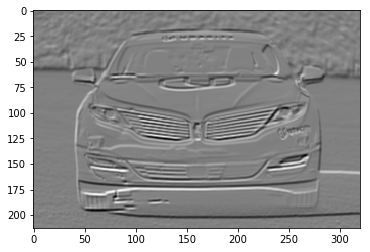

In [82]:
plt.imshow(np.stack(filtered_images[1::2], axis=-1).mean(axis=-1), cmap='gray')

In [86]:
np.stack(filtered_images[1::2], axis=-1) + np.stack(filtered_images[::2], axis=-1)

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       ...,

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0.

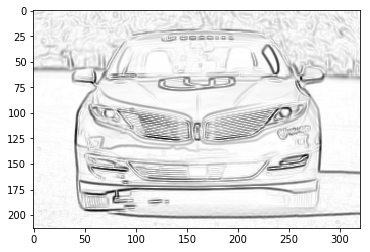

In [96]:
absoluted_image = np.absolute(np.stack(filtered_images, axis=-1)).mean(axis=-1)
# plt.imshow(absoluted_image, cmap='gray')
plt.imshow(absoluted_image, cmap='gray_r')